In [1]:
import pandas as pd
import os

MCLP_path = './make_files/MCLP'  # MCLP 자료
p_median_path = './make_files/p_median'  # P-median 자료
output_path = './make_files/sum'        # 두 값의
if not os.path.exists(output_path):
    os.makedirs(output_path)
else:
    pass

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                                                            # 각 격자의 상대적인 우위 수준을, Standard Scaling을 통해 나타냄

cnt = 1
for i, j in zip(os.listdir(MCLP_path),  os.listdir(p_median_path)):
    mclp_data = pd.read_excel(os.path.join(MCLP_path,i), index_col=0)                         # MCLP data
    p_median_data = pd.read_excel(os.path.join(p_median_path, j), index_col=0)               # P-median data

    rank_1 = scaler.fit_transform(mclp_data[['cover']]).squeeze()                           # MLCP는 cover 열이 클수록 우위  
    rank_2 = scaler.fit_transform(p_median_data[['cost']]).squeeze() * (-1)                  # P-median은 cost 열이 작을수록 우위 -> (-1) 을 곱하여 구함
    local_data = pd.DataFrame({'MCLP' : rank_1, 'P-median' : rank_2, 'SUM' : rank_1 + rank_2})

    local_data.to_excel(os.path.join(output_path, 'sum_data_{}.xlsx'.format(str(cnt))), encoding='utf-8')        # 엑셀로 3개 행정동에 대하여 저장
    cnt += 1

In [28]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# plt.rcParams['font.family'] = 'Malgun Gothic'


In [ ]:
import pandas as pd
import os
data_path = './make_files/sum'

mclp_data = pd.read_excel(os.path.join(data_path, 'sum_data_1.xlsx'), index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
No handles with labels found to put in legend.


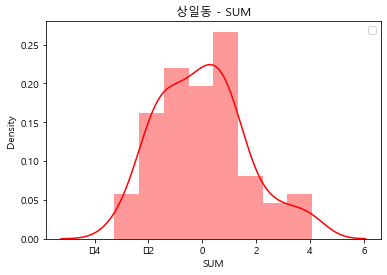

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')

plt.title("상일동 - SUM", color='black') 
plt.rc("font", family='Malgun Gothic')
sns.distplot(mclp_data['SUM'], color='red')
plt.savefig('./MCLP.png')
plt.legend()
plt.show()


In [3]:
mclp_data

,MCLP,P-median,SUM
0,-0.487072,-1.375976,-1.863048
1,-0.986807,-1.499716,-2.486523
2,-1.278112,0.073490,-1.204622
3,0.380787,-0.800104,-0.419317
4,-0.446322,-0.212004,-0.658327
...,...,...,...
89,0.759649,-0.295562,0.464087
90,-1.654771,0.408417,-1.246354
91,0.459533,0.113170,0.572702
92,-0.239545,1.358164,1.118618
